In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import requests 

In [29]:
url = "https://data.cdc.gov/resource/vbim-akqf.json?$limit=10000000&$offset=0"
response = requests.get(url,timeout=60).json()

In [30]:
cdc_report_dt = []
pos_spec_dt = []
current_status = []
sex = []
age_group = []
race_ethnicity_combined =[]
hosp_yn =[]
icu_yn = []
death_yn = []
medcond_yn = []
onset_dt = []
for each_data in response:
    cdc_report_dt.append(each_data["cdc_report_dt"])
    #pos_spec_dt.append(each_data["pos_spec_dt"])
    current_status.append(each_data["current_status"])
    sex.append(each_data["sex"])
    age_group.append(each_data["age_group"])
    race_ethnicity_combined.append(each_data["race_ethnicity_combined"])
    hosp_yn.append(each_data["hosp_yn"])
    icu_yn.append(each_data["icu_yn"])
    death_yn.append(each_data["death_yn"])
    medcond_yn.append(each_data["medcond_yn"])

    

In [31]:
covid_info_dict = {
    "cdc_report_date" : cdc_report_dt,
    #"pos_spec_date" : pos_spec_dt,
    "status" : current_status,
    "gender" : sex,
    "age_group" : age_group,
    "race_ethnicity_combined" : race_ethnicity_combined,
    "hosp_yn" : hosp_yn,
    "icu_yn" : icu_yn,
    "death_yn" : death_yn,
    "medcond_yn" : medcond_yn
    
}
covid_df = pd.DataFrame(covid_info_dict)
covid_df

,cdc_report_date,status,gender,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-03-03T00:00:00.000,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
1,2020-03-03T00:00:00.000,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
2,2020-04-07T00:00:00.000,Laboratory-confirmed case,Unknown,0 - 9 Years,Unknown,No,Missing,Missing,Missing
3,2020-08-04T00:00:00.000,Probable Case,Male,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
4,2020-07-28T00:00:00.000,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,Missing
...,...,...,...,...,...,...,...,...,...
3662320,2020-05-26T00:00:00.000,Probable Case,Other,30 - 39 Years,Unknown,No,Unknown,No,Yes
3662321,2020-05-26T00:00:00.000,Probable Case,Other,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown
3662322,2020-05-26T00:00:00.000,Laboratory-confirmed case,Other,30 - 39 Years,Unknown,No,Unknown,No,Unknown
3662323,2020-05-26T00:00:00.000,Probable Case,Other,30 - 39 Years,Unknown,No,Unknown,No,Unknown


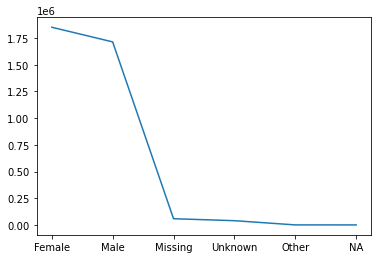

In [32]:
covid_df["gender"].value_counts().plot()

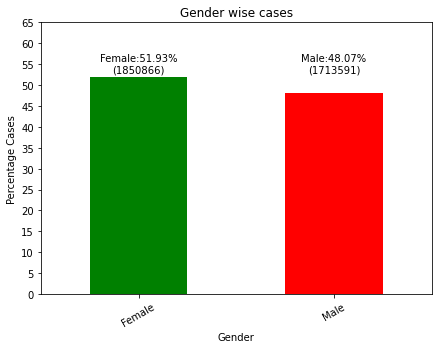

In [33]:
from matplotlib import pyplot as plt
# removed the unwanted data of Missing, Unknown and Other
df2 = covid_df[(covid_df["gender"] == "Male") | (covid_df["gender"] == "Female")] 
#show the Percentage value.
df3 =(df2['gender'].value_counts()/df2['gender'].count())*100  
#plot the Graph
ax = df3.plot.bar(color=['green', 'red'],title="Gender wise cases", figsize=(7,5), zorder=2, width=0.5)
# add the labels
plt.xlabel("Gender")
plt.ylabel("Percentage Cases")
plt.xticks(rotation=30, horizontalalignment="center")
ax.set_yticks(range(0,70,5)) 
df4=df2["gender"].value_counts()
#Add the text on top of bar chart
j=0
for i in df3.index: 
    str1 = i + ":" + str(df3[i].round(2)) + "%\n(" + str(df4[i]) + ")"
    ax.text(j,55,str1, ha='center', va='center')
    j +=1

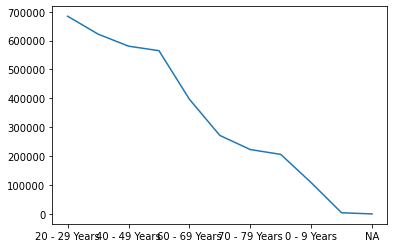

In [34]:
age_group_df1 = covid_df["age_group"].value_counts()
age_group_df1.plot()

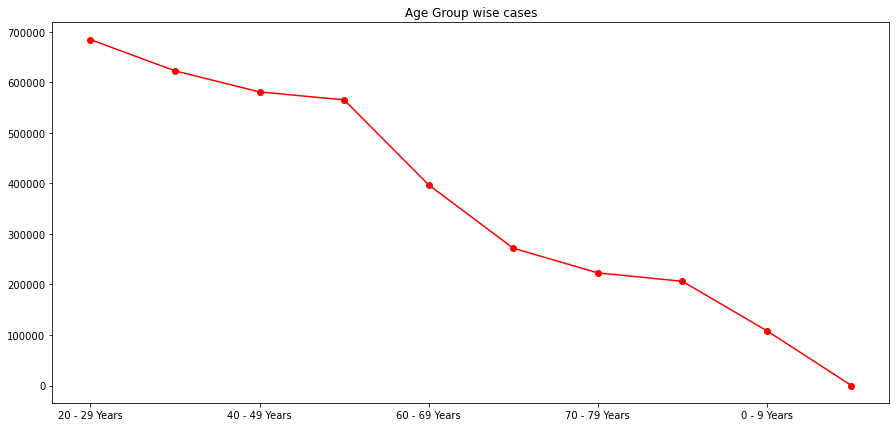

In [36]:
age_group_df = covid_df[(covid_df["age_group"] != 0) &  (covid_df["age_group"] != "Unknown")] 
age_group_df1 = age_group_df["age_group"].value_counts()
ax = age_group_df1.plot(color=['red'],title="Age Group wise cases", figsize=(15,7),marker='o')

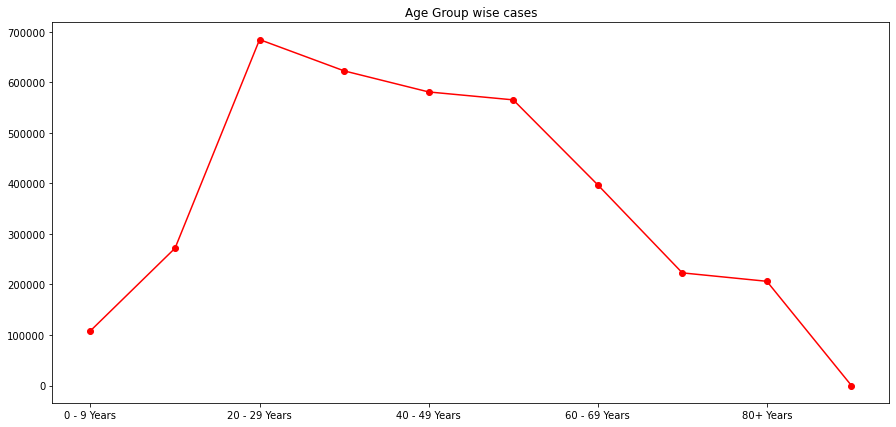

In [37]:
age_group_df1 = age_group_df["age_group"].value_counts()
age_group_df1.sort_index(inplace=True)
ax = age_group_df1.plot(color=['red'],title="Age Group wise cases", figsize=(15,7),marker='o')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

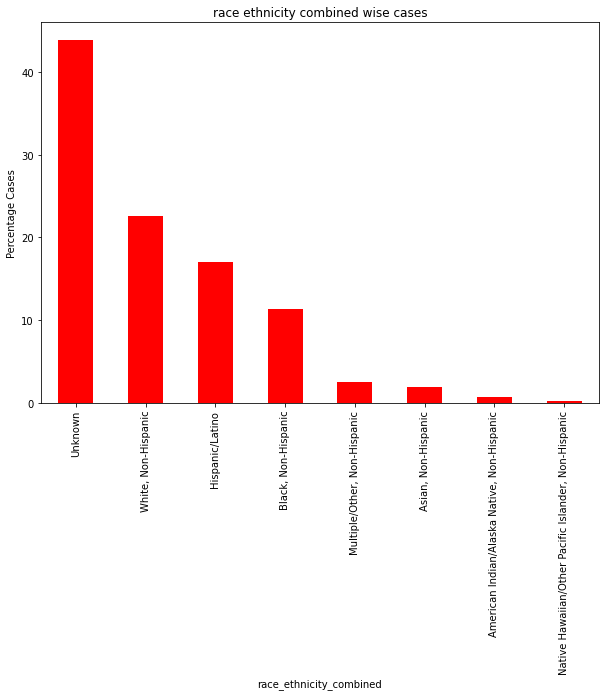

In [48]:
df2 = covid_df[(covid_df["race_ethnicity_combined"] != "NA")]
#show the Percentage value.
df3 =(df2['race_ethnicity_combined'].value_counts()/df2['race_ethnicity_combined'].count())*100  
ax = df3.plot.bar(color=['red'],title="race ethnicity combined wise cases",figsize=(10,7), zorder=2, width=0.5)
# add the labels
plt.xlabel("race_ethnicity_combined")
plt.ylabel("Percentage Cases")
plt.xticks(rotation=90, horizontalalignment="center")

In [47]:
covid_df.groupby('age_group')["death_yn"].count()

age_group
0 - 9 Years      108383
10 - 19 Years    271652
20 - 29 Years    684226
30 - 39 Years    622332
40 - 49 Years    580660
50 - 59 Years    564999
60 - 69 Years    396925
70 - 79 Years    222836
80+ Years        206172
NA                   94
Unknown            4046
Name: death_yn, dtype: int64

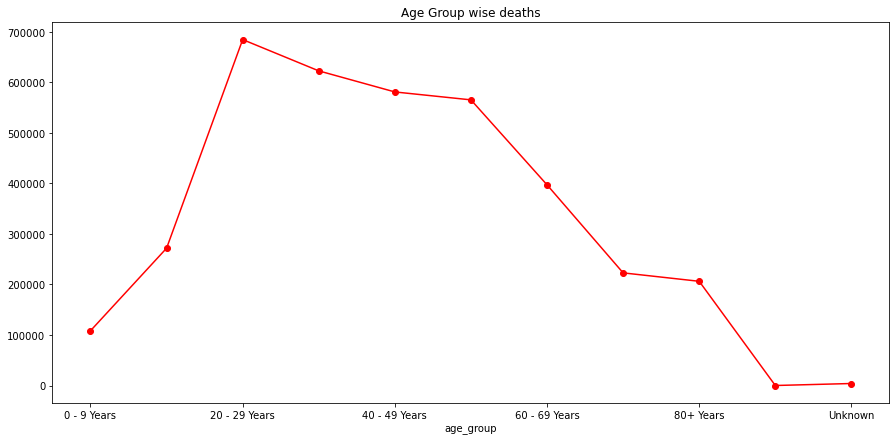

In [52]:

ax = covid_df.groupby('age_group')["death_yn"].count().plot(color=['red'],title="Age Group wise deaths", figsize=(15,7),marker='o')


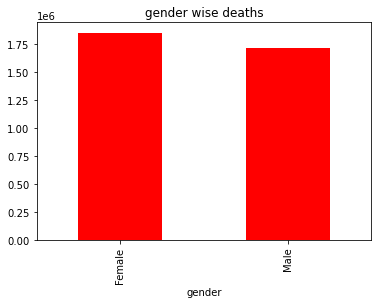

In [56]:
df2 = covid_df[(covid_df["gender"] == "Male") | (covid_df["gender"] == "Female")] 
df2.groupby('gender')["death_yn"].count().plot.bar(color=['red'],title="gender wise deaths")

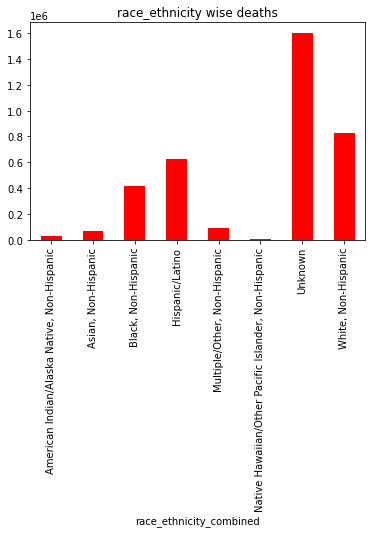

In [57]:
df2 = covid_df[(covid_df["race_ethnicity_combined"] != "NA")]
df2.groupby('race_ethnicity_combined')["death_yn"].count().plot.bar(color=['red'],title="race_ethnicity wise deaths")